In [2]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 762.0 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 762.0 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 819.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 839.3 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 894.7 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 906.5 kB/s eta 0:00:00


In [4]:
!pip install mlflow

   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.7 MB ? eta -:--:--
    --------------------------------------- 0.5/24.7 MB 558.9 kB/s eta 0:00:44
    --------------------------------------- 0.5/24.7 MB 558.9 kB/s eta 0:00:44
   - -------------------------------------- 0.8/24.7 MB 621.2 kB/s eta 0:00:39
   - -------------------------------------- 1.0/24.7 MB 680.3 kB/s eta 0:00:35
   - -------------------------------------- 1.0/24.7 MB 680.3 kB/s eta 0:00:35
   -- ------------------------------------- 1.3/24.7 MB 721.7 kB/s eta 0:00:33
   -- ------------------------------------- 1.6/24.7 MB 755.9 kB/s eta 0:00:31
   -- ------------------------------------- 1.8/24.7 MB 786.4 kB/s eta 0:00:30
   --- -----------

In [5]:
# Customer Retention Prediction Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import lightgbm as lgb
import mlflow

In [8]:
# Step 2: Load Data
train_df = pd.read_csv('C:/Users/hp/Desktop/ML DATASETS/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('C:/Users/hp/Desktop/ML DATASETS/customer_churn_dataset-testing-master.csv')

In [9]:
# Step 3: Clean Data
train_df.dropna(inplace=True)  # Drop the 1 row with missing values

In [10]:
# Step 4: Encode Categorical Features
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [11]:
# Step 5: Split Features and Target
X = train_df.drop(columns=['CustomerID', 'Churn'])
y = train_df['Churn']

In [12]:
# Step 6: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 7: Train LightGBM Model
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199895, number of negative: 152770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566813 -> initscore=0.268859
[LightGBM] [Info] Start training from score 0.268859


LGBMClassifier(random_state=42)

In [14]:
# Step 8: Evaluate Model
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

In [15]:
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Confusion Matrix:
 [[38056     7]
 [   15 50089]]
ROC AUC Score: 0.9999996114536851


In [16]:
# Step 9: Predict on Test Set
test_features = test_df.drop(columns=['CustomerID', 'Churn'])
test_preds = model.predict(test_features)
test_proba = model.predict_proba(test_features)[:, 1]

In [17]:
# Step 10: Append Predictions to Test Data
test_df['Predicted_Churn'] = test_preds
test_df['Churn_Probability'] = test_proba

In [19]:
# Step 11: Save Output
test_df.to_csv('C:/Users/hp/Desktop/ML DATASETS/churn_predictions.csv', index=False)

In [20]:
# Step 12: Track with MLflow
mlflow.set_experiment("Customer Retention Prediction")
with mlflow.start_run():
    mlflow.log_param("model", "LightGBM")
    mlflow.log_metric("roc_auc", roc_auc_score(y_val, y_proba))
    mlflow.sklearn.log_model(model, "lightgbm_model")

2025/07/15 02:27:30 INFO mlflow.tracking.fluent: Experiment with name 'Customer Retention Prediction' does not exist. Creating a new experiment.
2025/07/15 02:27:30 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Examp

C:\Users\hp\AppData\Local\Temp\ipykernel_11144\1030979231.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


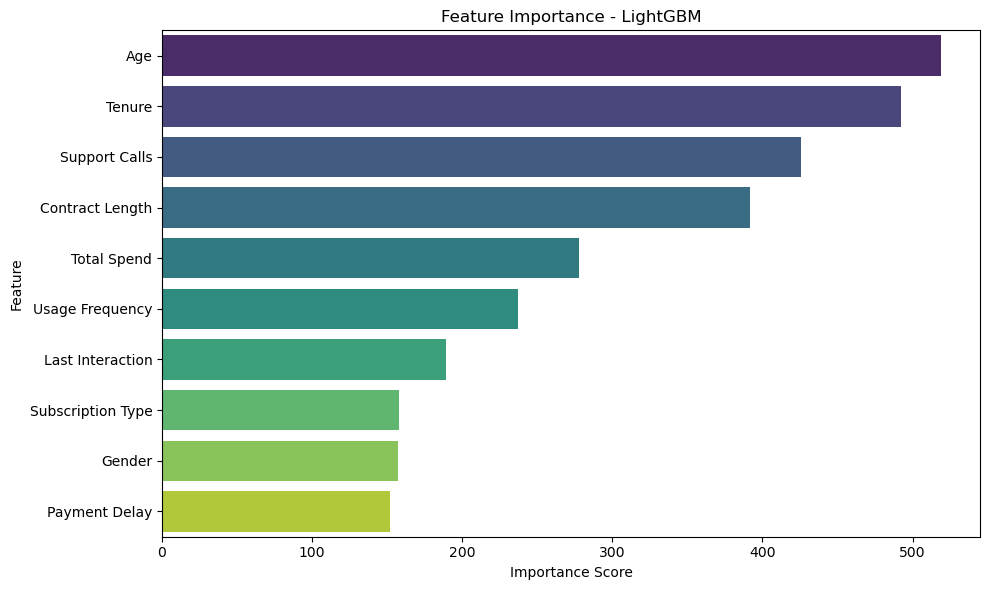

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've trained a LightGBM model as 'model' and have features in 'X'
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - LightGBM')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [27]:
import pickle

# Save the trained model
with open('lightgbm_model.pk', 'wb') as f:
    pickle.dump(model, f)

In [23]:
import os
print(os.getcwd())


C:\Users\hp


In [24]:
!where python  # on Windows

C:\Users\hp\anaconda3\python.exe
C:\Users\hp\AppData\Local\Microsoft\WindowsApps\python.exe


INFO: Could not find "#".
INFO: Could not find "on".
INFO: Could not find "Windows".
